In [36]:
import pandas as pd
import numpy as np
import os


In [37]:
df = pd.read_csv("insurance.csv")
print(df.shape)
df.head()

(1338, 7)


,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [39]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.00,27.0000,39.00,51.000,64.00
bmi,1338.0,30.665471,6.098382,16.00,26.3000,30.40,34.700,53.10
children,1338.0,1.094918,1.205493,0.00,0.0000,1.00,2.000,5.00
expenses,1338.0,13270.422414,12110.011240,1121.87,4740.2875,9382.03,16639.915,63770.43


In [40]:
categorical_col = [col for col in df.columns if df[col].dtype in ['object', 'category', 'bool']]
numerical_col = [col for col in df.columns if df[col].dtype in ["int64", 'float64']]

categorical_col,  numerical_col

(['sex', 'smoker', 'region'], ['age', 'bmi', 'children', 'expenses'])

**Univariate Analysis**

Univariate analysis focuses on analyzing each variable individually. Common methods include plotting histograms, box plots, and calculating summary statistics.

**1. Summary Statistics**

This provides mean, standard deviation, min, 25th percentile, median, 75th percentile, and max for numerical columns.

In [41]:
print(df.describe())


               age          bmi     children      expenses
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.665471     1.094918  13270.422414
std      14.049960     6.098382     1.205493  12110.011240
min      18.000000    16.000000     0.000000   1121.870000
25%      27.000000    26.300000     0.000000   4740.287500
50%      39.000000    30.400000     1.000000   9382.030000
75%      51.000000    34.700000     2.000000  16639.915000
max      64.000000    53.100000     5.000000  63770.430000


**2. Histograms**

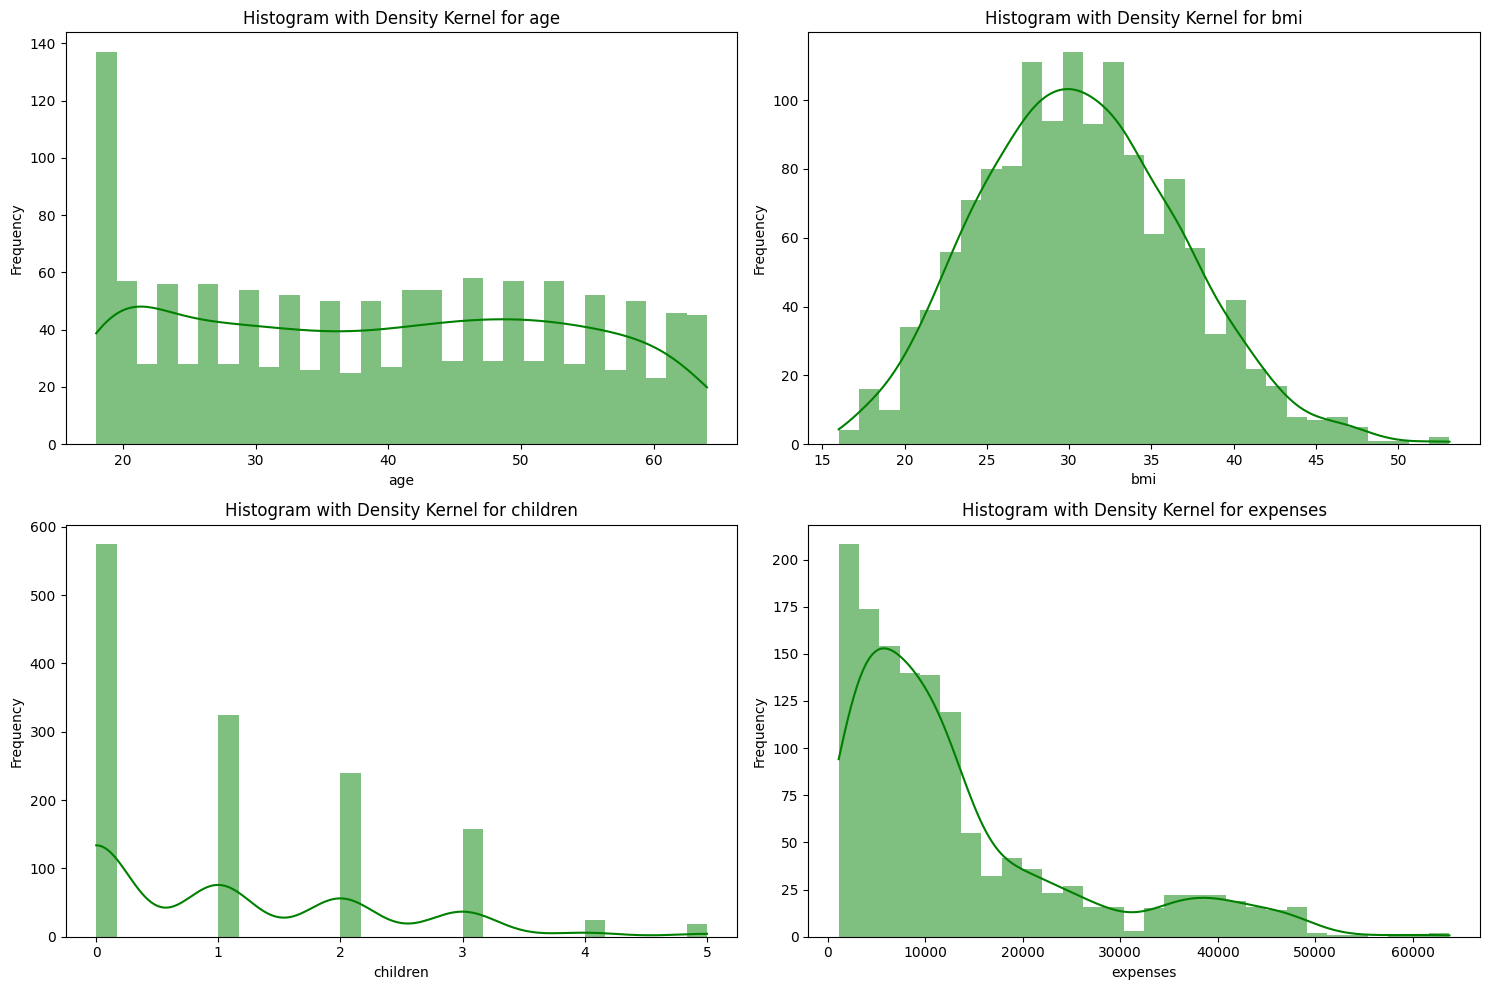

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

n_cols = 2  # Number of plots per row
n_rows = len(numerical_cols) // n_cols + (len(numerical_cols) % n_cols != 0)

plt.figure(figsize=(15, 5 * n_rows))

for i, col in enumerate(numerical_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.histplot(df[col], kde=True, bins=30, color='green', linewidth=0)
    plt.title(f'Histogram with Density Kernel for {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


**3. Box Plots**

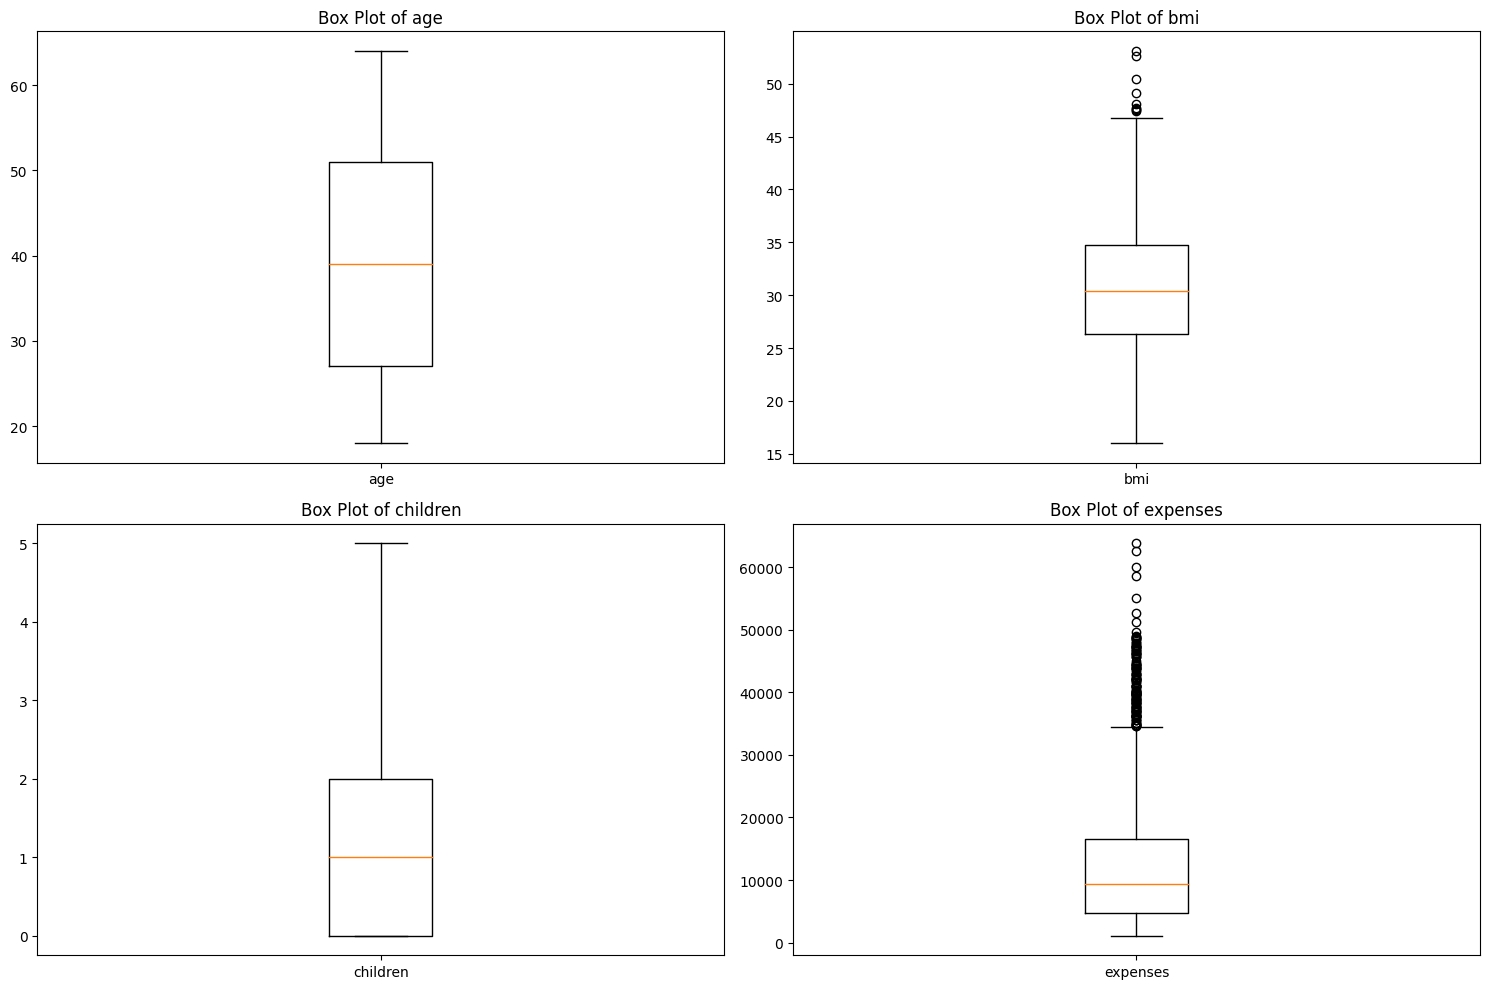

In [8]:
import matplotlib.pyplot as plt

numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
n_cols = 2  # Number of plots per row
n_rows = len(numerical_cols) // n_cols + (len(numerical_cols) % n_cols != 0)

plt.figure(figsize=(15, 5 * n_rows))

for i, col in enumerate(numerical_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    plt.boxplot(df[col])
    plt.title(f'Box Plot of {col}')
    plt.xticks([1], [col])

plt.tight_layout()
plt.show()


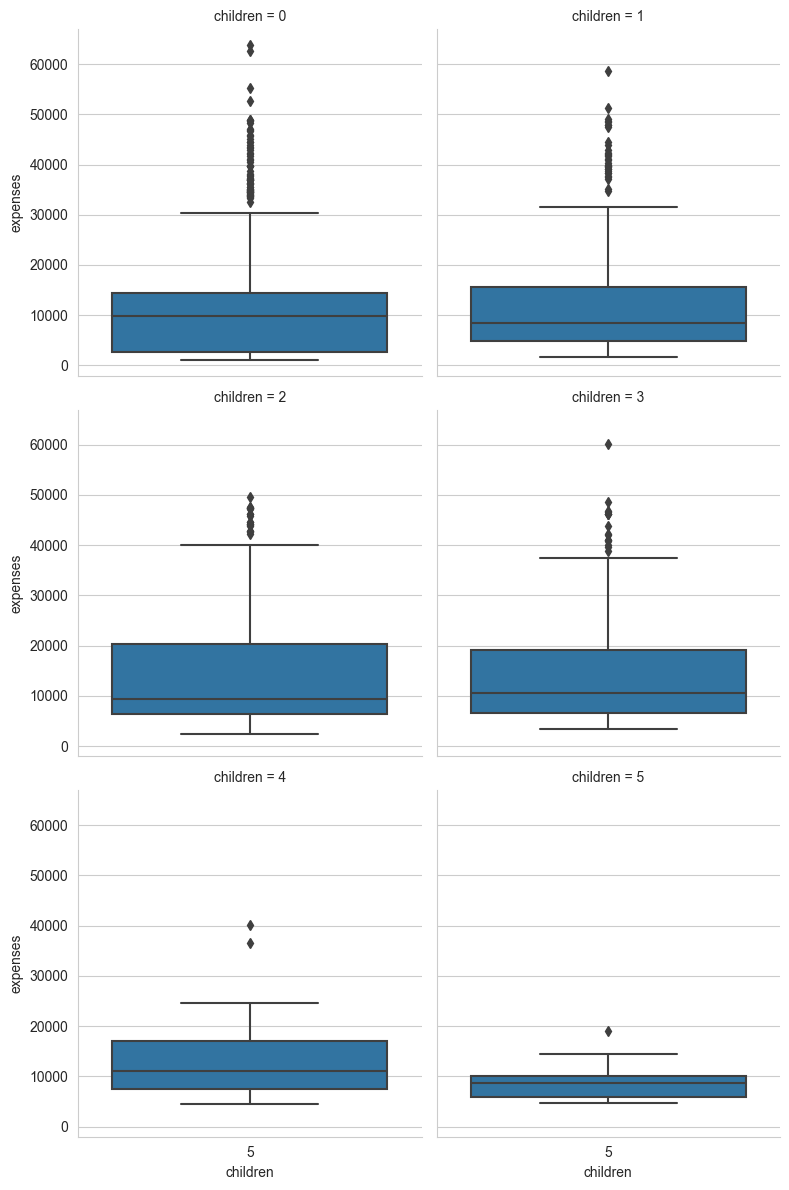

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create a figure with a grid of plots
g = sns.FacetGrid(df, col="children", col_wrap=2, height=4)
g.map_dataframe(sns.boxplot, x="children", y="expenses")

plt.tight_layout()
plt.show()


**4. Bar Plots for Categorical Data**


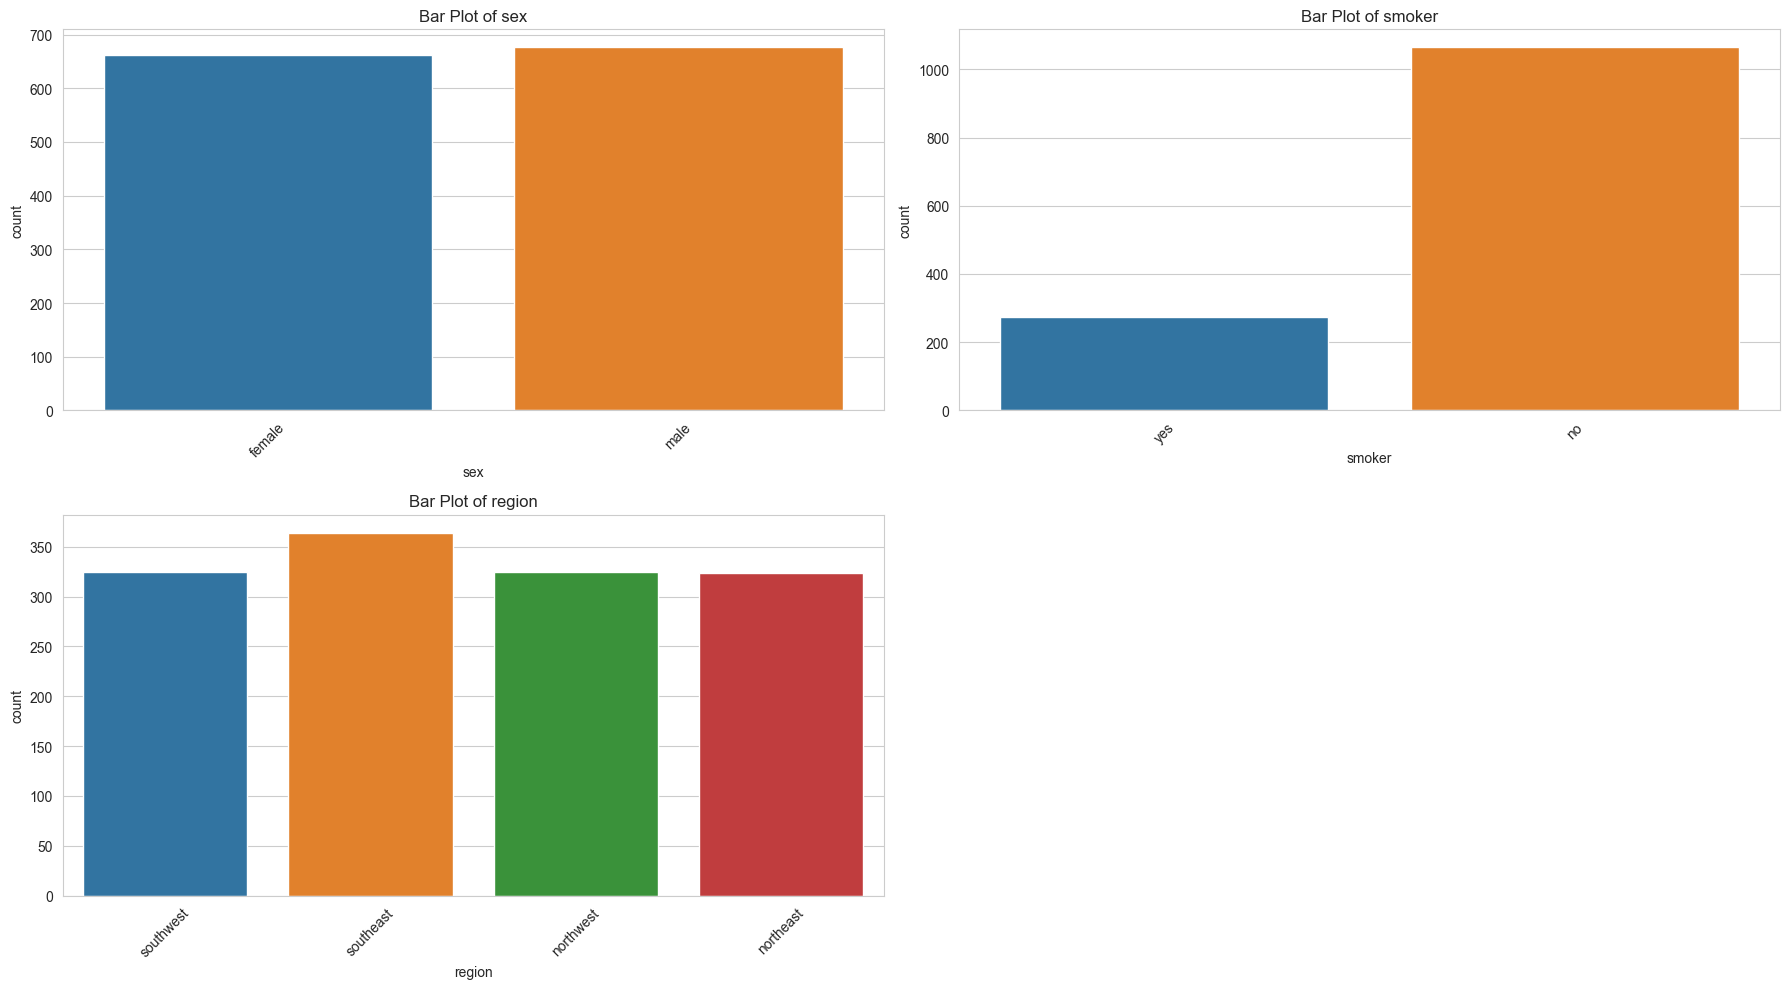

In [10]:
import seaborn as sns

categorical_col = df.select_dtypes(include=['object', 'category']).columns

n_cols = 2  # Number of plots per row
n_rows = len(categorical_col) // n_cols + (len(categorical_col) % n_cols != 0)

plt.figure(figsize=(18, 5 * n_rows))


for i, col in enumerate(categorical_col) :
    plt.subplot(n_rows, n_cols, i + 1)
    sns.countplot(x=col, data=df)
    plt.xticks(rotation=45)
    plt.title(f'Bar Plot of {col}')

plt.tight_layout()
plt.show()

**Bivariate Analysis**
  
Bivariate analysis examines the relationship between two variables. This can involve scatter plots, correlation matrices, and cross-tabulations.

**1. Correlation Matrix**

C:\Users\pramod\AppData\Local\Temp\ipykernel_13816\2949067426.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


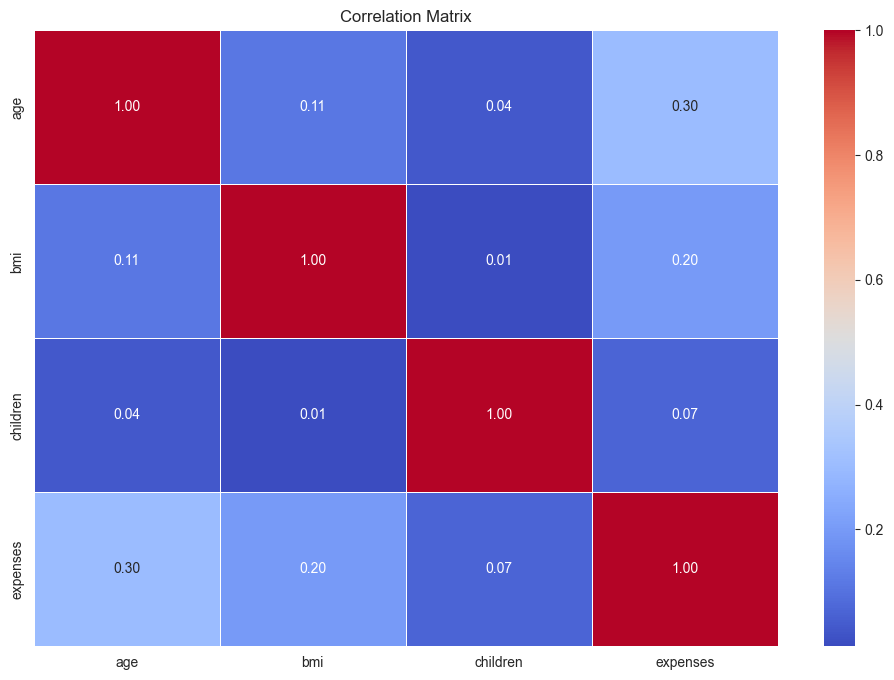

In [11]:
import seaborn as sns

plt.figure(figsize=(12, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


**2. Scatter Plots for Numerical Variables**

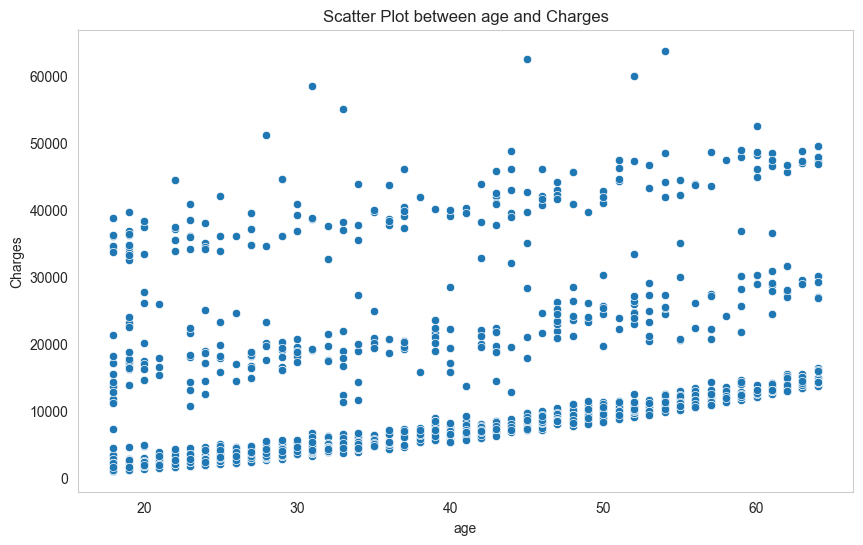

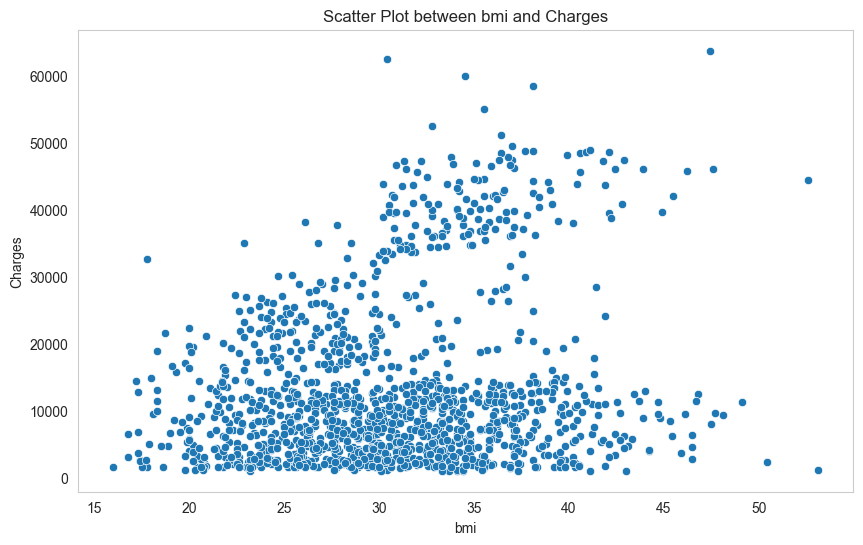

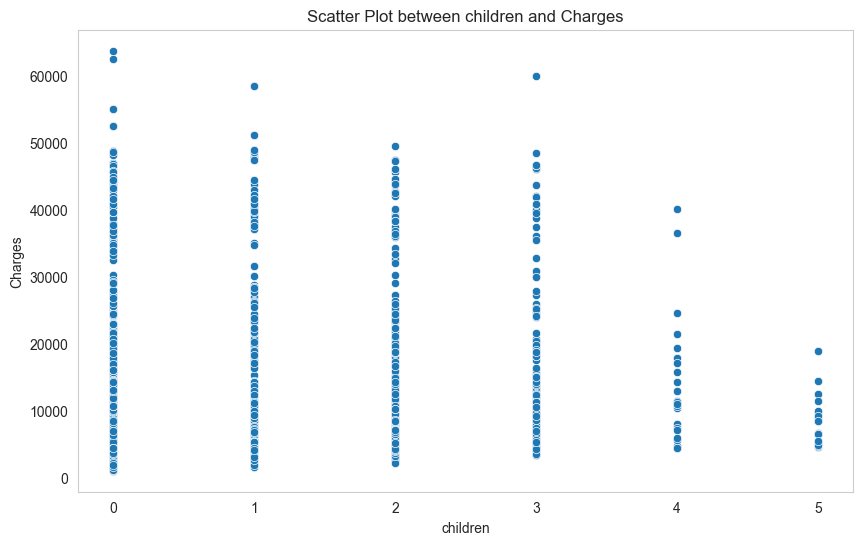

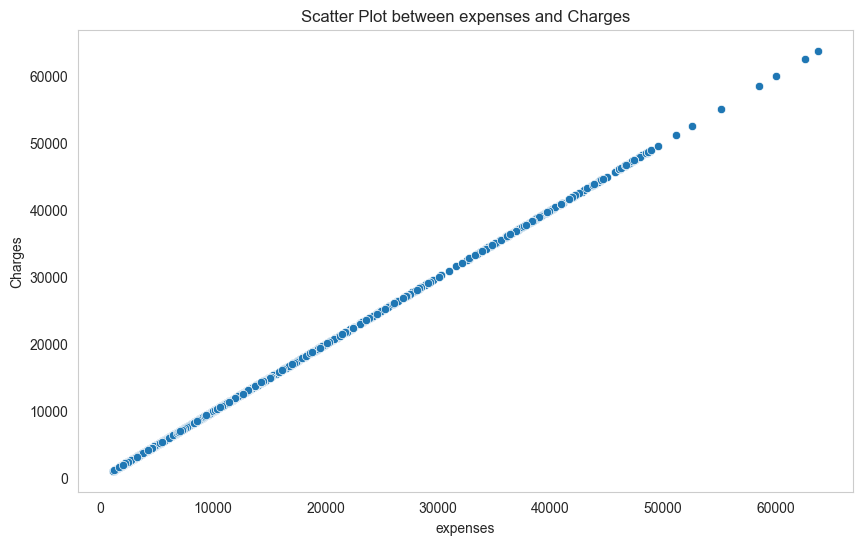

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    
    # Create scatter plot
    ax = sns.scatterplot(x=col, y='expenses', data=df)
    
    # Remove grid lines
    ax.grid(False)
    
    # Add title and labels
    plt.title(f'Scatter Plot between {col} and Charges')
    plt.xlabel(col)
    plt.ylabel('Charges')

    plt.show()


**3. Box Plots for Categorical vs. Numerical**


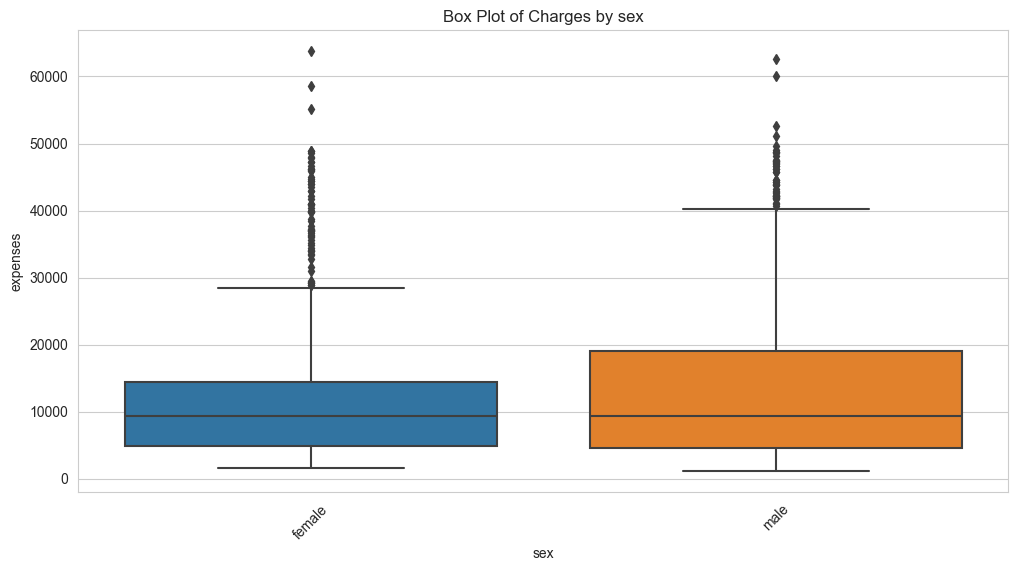

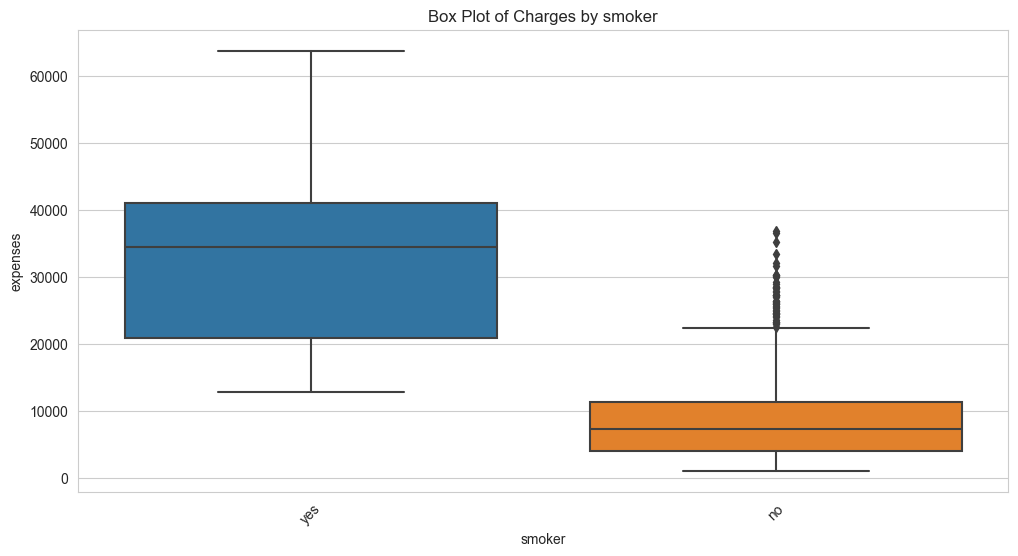

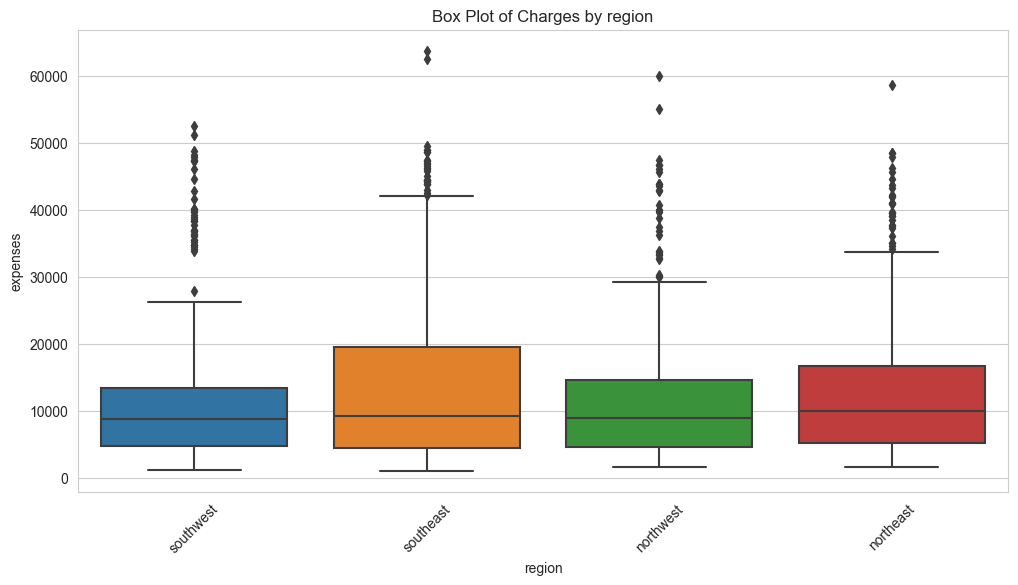

In [13]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

for col in categorical_cols:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=col, y='expenses', data=df)
    plt.xticks(rotation=45)
    plt.title(f'Box Plot of Charges by {col}')
    plt.show()


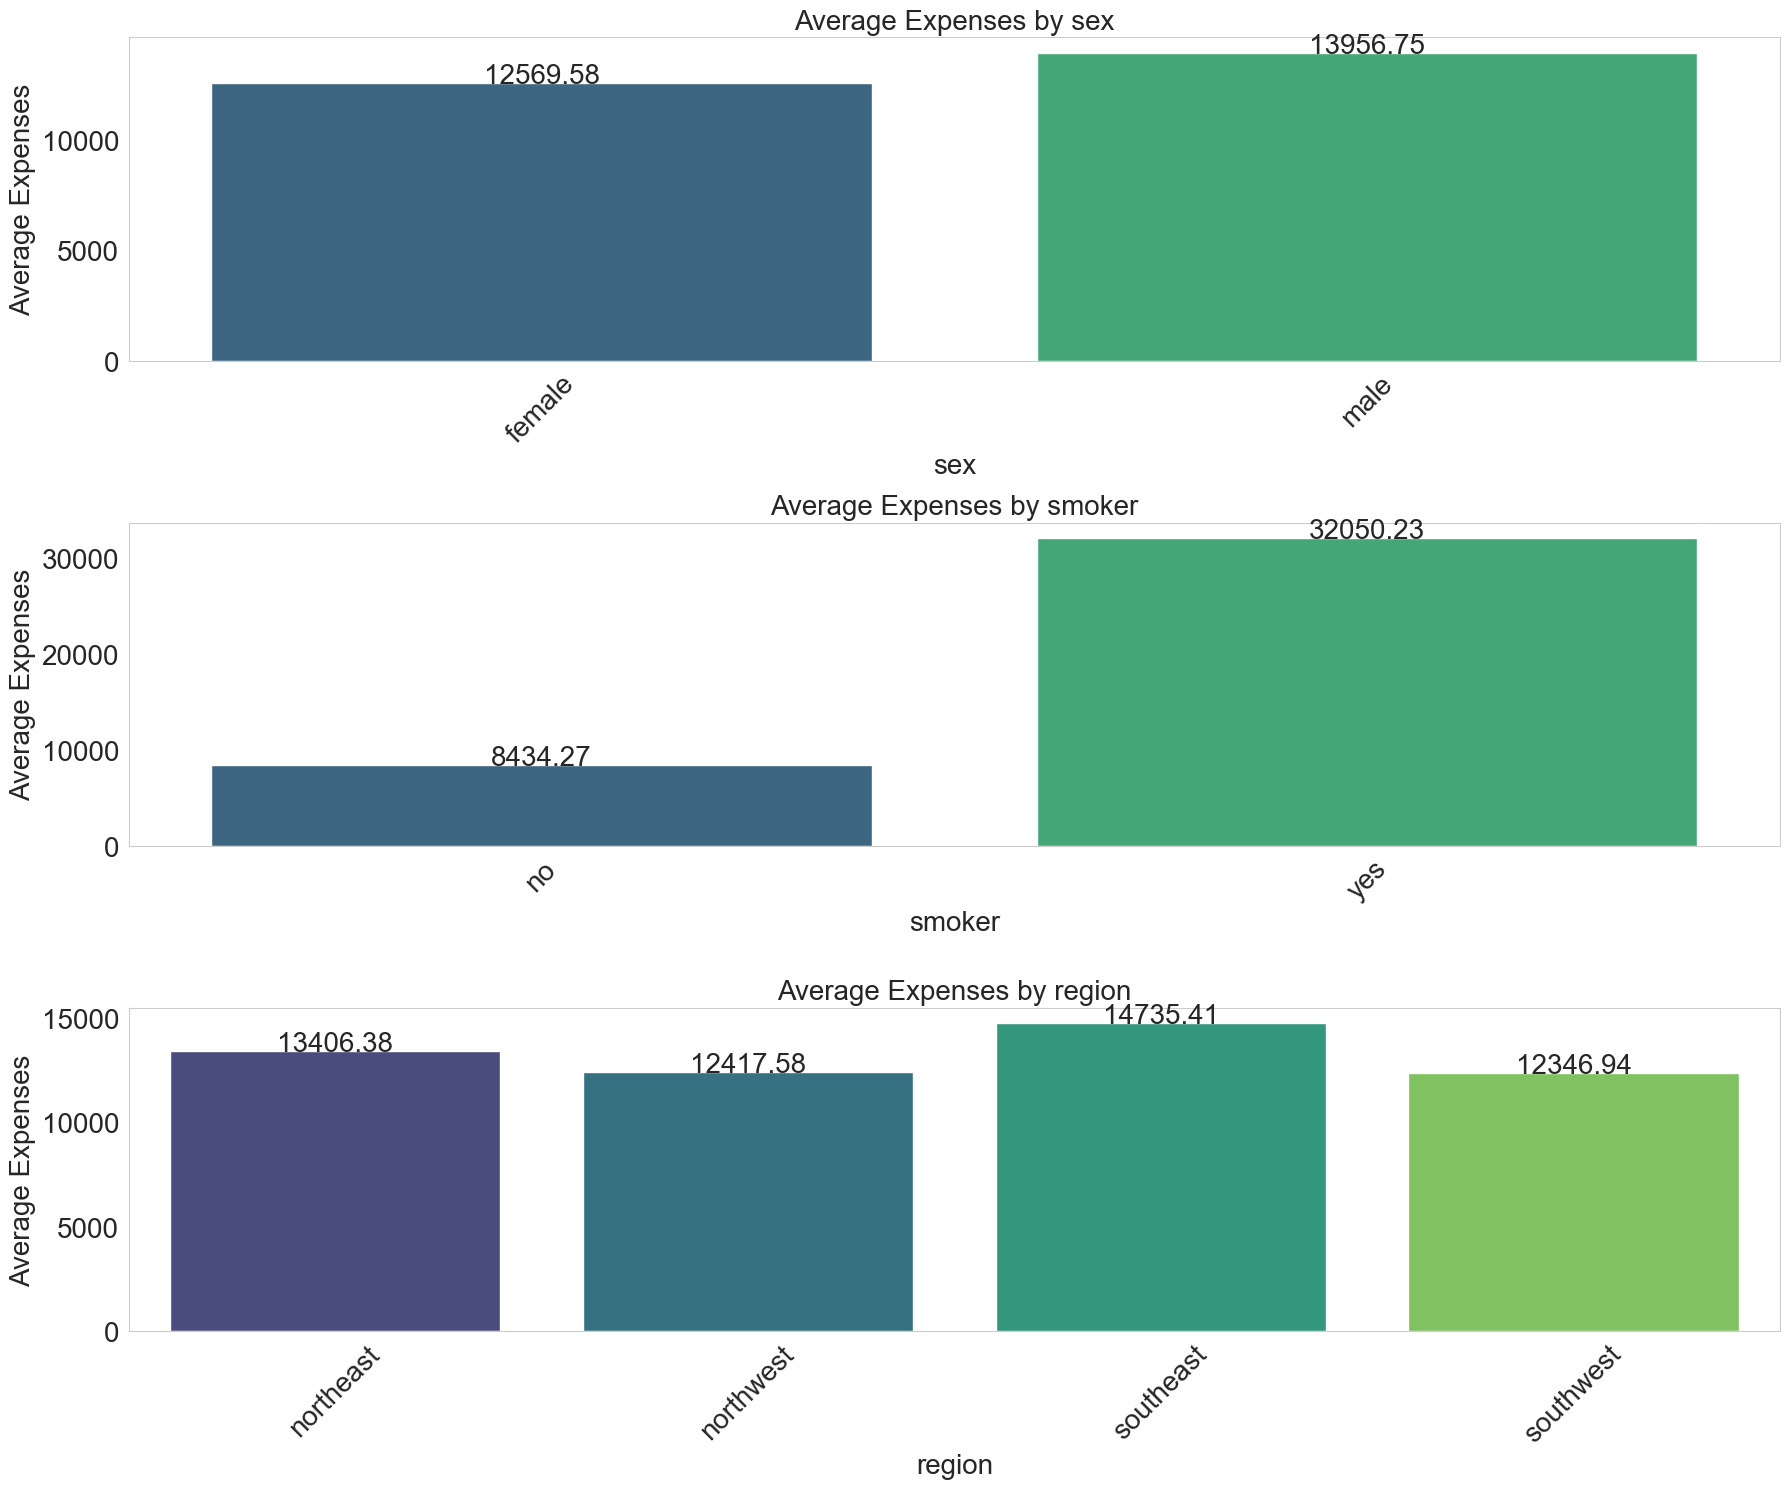

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select categorical columns
categorical_col = df.select_dtypes(include=['object', 'category']).columns

n_cols = 1  # Number of plots per row
n_rows = len(categorical_col) // n_cols + (len(categorical_col) % n_cols != 0)

plt.figure(figsize=(18, 5 * n_rows))

for i, col in enumerate(categorical_col):
    plt.subplot(n_rows, n_cols, i + 1)
    
    # Aggregate expenses by category
    avg_expenses = df.groupby(col)['expenses'].mean().reset_index()
    
    # Plot
    ax = sns.barplot(x=col, y='expenses', data=avg_expenses, palette='viridis')
    
    # Add annotations on top of the bars
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', 
                    xytext=(0, 5), 
                    textcoords='offset points',
                    fontsize=20)  # Increase font size for bar values
    
    # Remove grid lines
    ax.grid(False)
    
    # Increase font size for axis labels
    ax.set_xlabel(col, fontsize=20)
    ax.set_ylabel('Average Expenses', fontsize=20)
    
    # Increase font size for tick labels
    ax.tick_params(axis='both', which='major', labelsize=20)
    
    plt.xticks(rotation=45, fontsize=20)
    plt.title(f'Average Expenses by {col}', fontsize=20)

plt.tight_layout()
plt.show()


**4. Cross-Tabulation for Categorical Variables**

Cross Tabulation of sex and Smoker
smoker   no  yes
sex             
female  547  115
male    517  159


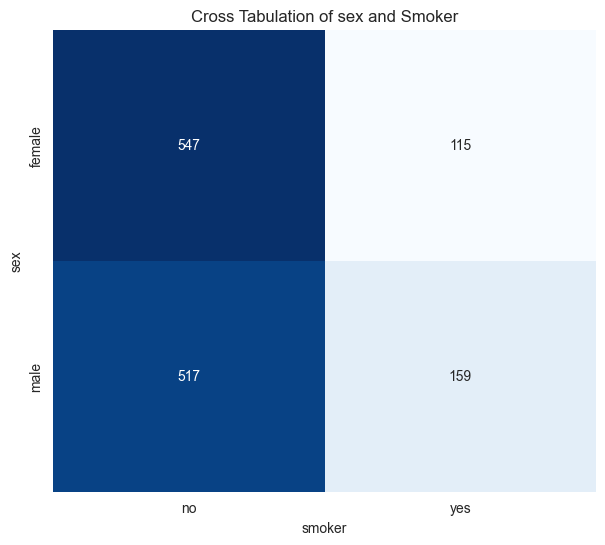

Cross Tabulation of smoker and Smoker
smoker    no  yes
smoker           
no      1064    0
yes        0  274


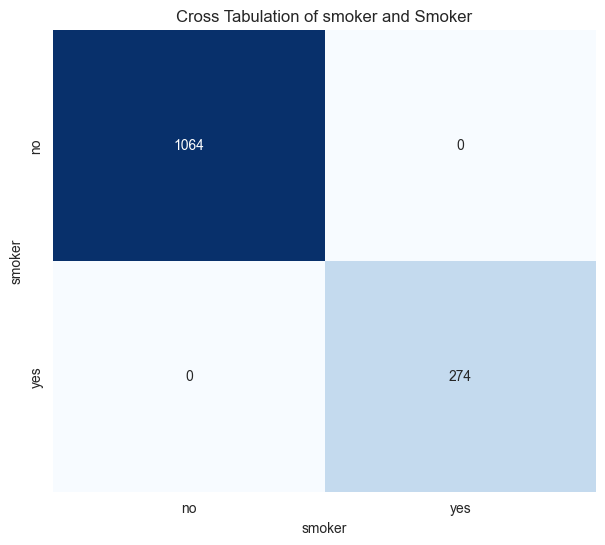

Cross Tabulation of region and Smoker
smoker      no  yes
region             
northeast  257   67
northwest  267   58
southeast  273   91
southwest  267   58


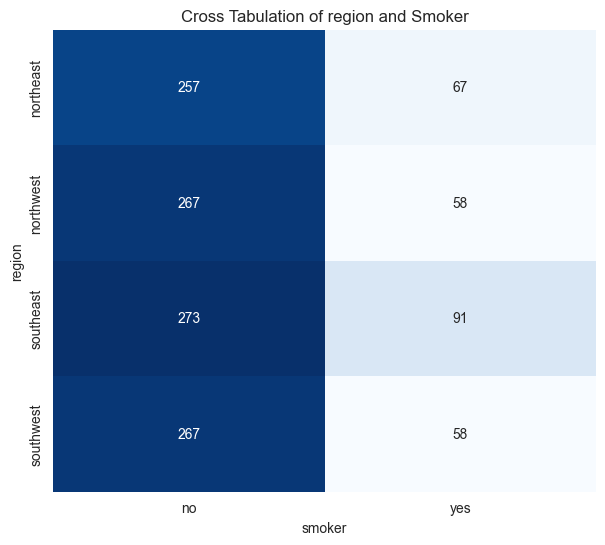

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

for col in categorical_cols:
    # Create cross-tabulation
    crosstab = pd.crosstab(df[col], df['smoker'])
    
    # Print cross-tabulation
    print(f'Cross Tabulation of {col} and Smoker')
    print(crosstab)
    
    # Create heatmap with integer formatting
    plt.figure(figsize=(7, 6))
    sns.heatmap(crosstab, annot=True, fmt='d', cmap='Blues', cbar=False)
    
    # Add title and show plot
    plt.title(f'Cross Tabulation of {col} and Smoker')
    plt.show()


**Feature Engineering and Model Training**

**1. Data Preprocessing**

**Handle Missing Values:**

In [16]:
# Check for missing values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

**Encode Categorical Variables:**

In [17]:
import pandas as pd

# Convert categorical columns to numerical using one-hot encoding
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.head()

,age,bmi,children,expenses,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.9,0,16884.92,0,1,0,0,1
1,18,33.8,1,1725.55,1,0,0,1,0
2,28,33.0,3,4449.46,1,0,0,1,0
3,33,22.7,0,21984.47,1,0,1,0,0
4,32,28.9,0,3866.86,1,0,1,0,0


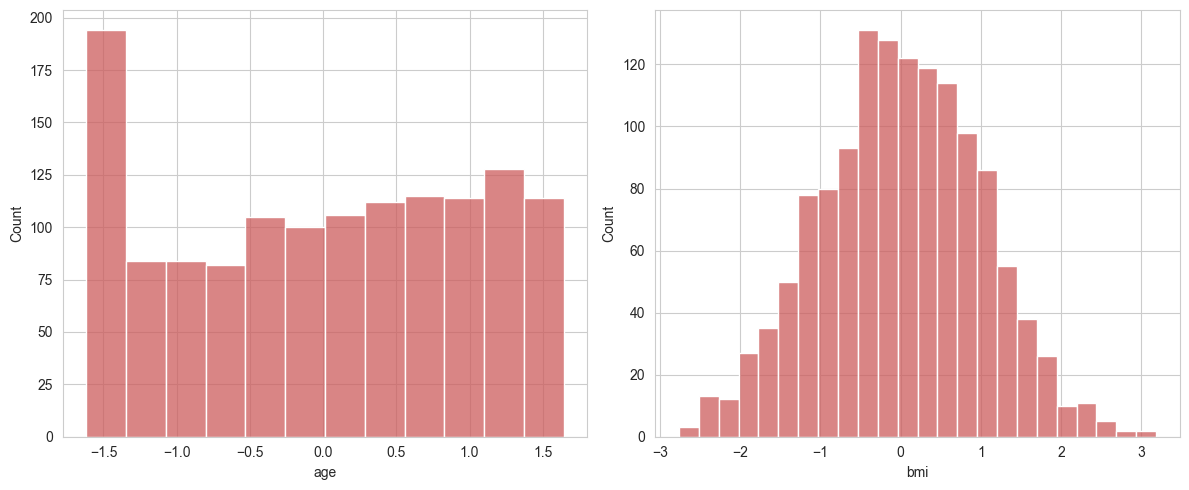

In [18]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')
transform_features = ['age', 'bmi']
X_copy = pt.fit_transform(df[transform_features])
X_copy = pd.DataFrame(X_copy, columns=transform_features)

plt.figure(figsize=(12, 5))
for i, col in enumerate(transform_features):
    plt.subplot(1, 2, i+1)
    sns.histplot(x=X_copy[col], color='indianred')
    plt.xlabel(col)
    plt.tight_layout()

In [42]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [43]:
oh_columns = ['sex','smoker','region']
transform_columns= ['age','bmi']
num_features = ['age','bmi']

from sklearn.preprocessing import OneHotEncoder, StandardScaler, PowerTransformer
from sklearn.compose import ColumnTransformer 
from sklearn.pipeline import Pipeline

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

transform_pipe = Pipeline(steps=[
    ('transformer', PowerTransformer(method='yeo-johnson'))
])

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, oh_columns),
        ("Transformer", transform_pipe, transform_columns),
        ("StandardScaler", numeric_transformer, num_features)
    ])

In [34]:
x = df.copy()
X = preprocessor.fit_transform(x)


In [35]:
X

array([[ 1.        ,  0.        ,  0.        , ..., -0.41011507,
        -1.43876426, -0.4536457 ],
       [ 0.        ,  1.        ,  1.        , ...,  0.55342732,
        -1.50996545,  0.51418574],
       [ 0.        ,  1.        ,  1.        , ...,  0.42843578,
        -0.79795355,  0.38295436],
       ...,
       [ 1.        ,  0.        ,  1.        , ...,  1.02318687,
        -1.50996545,  1.02270734],
       [ 1.        ,  0.        ,  1.        , ..., -0.77939769,
        -1.29636188, -0.79812808],
       [ 1.        ,  0.        ,  0.        , ..., -0.2058063 ,
         1.55168573, -0.25679863]])

**Split Data into Features and Target Variable**


In [44]:
X = df.drop('expenses', axis=1)  # Features
y = df['expenses']  # Target variable


**Split Data into Training and Testing Sets**

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train

,age,sex,bmi,children,smoker,region
560,46,female,20.0,2,no,northwest
1285,47,female,24.3,0,no,northeast
1142,52,female,24.9,0,no,southeast
969,39,female,34.3,5,no,southeast
486,54,female,21.5,3,no,northwest
...,...,...,...,...,...,...
1095,18,female,31.4,4,no,northeast
1130,39,female,23.9,5,no,southeast
1294,58,male,25.2,0,no,northeast
860,37,female,47.6,2,yes,southwest


In [48]:
x = df.copy()
X1 = preprocessor.fit_transform(X_train)
x2 =  preprocessor.transform(X_test)

x2

array([[ 1.        ,  0.        ,  1.        , ..., -0.87790559,
         0.40114007, -0.88770823],
       [ 1.        ,  0.        ,  1.        , ..., -0.0396956 ,
        -0.23863782, -0.09306431],
       [ 1.        ,  0.        ,  0.        , ..., -0.5719365 ,
         1.75178229, -0.60627185],
       ...,
       [ 0.        ,  1.        ,  1.        , ..., -0.37946891,
        -0.09646495, -0.42416595],
       [ 1.        ,  0.        ,  0.        , ...,  2.50622242,
         1.04091797,  2.7875199 ],
       [ 1.        ,  0.        ,  1.        , ...,  0.63602734,
         0.82765867,  0.60224912]])

In [24]:
import pandas as pd

from evidently.dashboard import Dashboard
from evidently.tabs import DataDriftTab, CatTargetDriftTab

from evidently.model_profile import Profile
from evidently.profile_sections import DataDriftProfileSection

C:\Users\pramod\anacondanew\Lib\site-packages\evidently\analyzers\__init__.py:3: UserWarning: analyzers are deprecated, use metrics instead
  warnings.warn("analyzers are deprecated, use metrics instead")
C:\Users\pramod\anacondanew\Lib\site-packages\evidently\dashboard\__init__.py:8: UserWarning: dashboards are deprecated, use metrics instead
  warnings.warn("dashboards are deprecated, use metrics instead")
C:\Users\pramod\anacondanew\Lib\site-packages\evidently\tabs\__init__.py:8: UserWarning: 'import evidently.tabs' is deprecated, use 'import evidently.dashboard.tabs'
  warnings.warn(
C:\Users\pramod\anacondanew\Lib\site-packages\evidently\model_profile\__init__.py:8: UserWarning: model profiles are deprecated, use metrics instead
  warnings.warn("model profiles are deprecated, use metrics instead")
C:\Users\pramod\anacondanew\Lib\site-packages\evidently\profile_sections\__init__.py:8: UserWarning: 'import evidently.profile_sections' is deprecated, use 'import evidently.model_profil

In [53]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [55]:
data_drift_dashboard = Dashboard(tabs=[DataDriftTab()])

data_drift_dashboard.calculate(df[:900], df[900:])

data_drift_dashboard.show()

In [56]:

data_drift_dashboard.save('data_drift_no_mapping.html')

data_drift_profile = Profile(sections=[DataDriftProfileSection()])

In [48]:
data_drift_profile.calculate(df[:900], df[900:])

In [49]:
import json
report = data_drift_profile.json()
json_report = json.loads(report)



In [50]:

n_features = json_report["data_drift"]["data"]["metrics"]["n_features"]
n_drifted_features = json_report["data_drift"]["data"]["metrics"]["n_drifted_features"]
drift_status = json_report["data_drift"]["data"]["metrics"]["dataset_drift"]


In [51]:
n_features, n_drifted_features, drift_status

(7, 1, False)

In [ ]:
data_drift_dashboard.calculate(df[:900], df[900:], column_mapping = column_mapping)

In [52]:
data_drift_dashboard.save('data_drift_no_mapping.html')


In [24]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_percentage_error, mean_squared_error

# import xgboost as xgb
# from xgboost import XGBRegressor


In [25]:
# pip install xgboost


In [26]:
def evaluate_clf(true, predicted):
    score = r2_score(true, predicted) # Calculate Accuracy
    mape = mean_absolute_percentage_error(true, predicted) # Calculate F1-score
    mse = mean_squared_error(true, predicted) # Calculate F1-score

    return score, mape , mse
    

In [27]:
models = {
    "Random Forest": RandomForestRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Logistic Regression": LinearRegression(),
     "K-Neighbors Regressor": KNeighborsRegressor(),
     "Support Vector Regressor": SVR(),
    "AdaBoost Regressor": AdaBoostRegressor()

}
#"XGBClassifier": XGBRegressor(), 
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error


In [28]:
# Create a function which can evaluate models and return a report 
def evaluate_models(X, y, models):
    '''
    This function takes in X and y and models dictionary as input
    It splits the data into Train Test split
    Iterates through the given model dictionary and evaluates the metrics
    Returns: Dataframe which contains report of all models metrics with cost
    '''
    # separate dataset into train and test
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
    
    models_list = []
    score = []
    mape= []
    
    for i in range(len(list(models))):
        model = list(models.values())[i]
        model.fit(X_train, y_train) # Train model

        # Make predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Training set performance
        model_train_r2_score, model_train_mape,model_train_mse = evaluate_clf(y_train ,y_train_pred)


        # Test set performance
        model_test_r2_score,model_test_mape,model_test_mse = evaluate_clf(y_test, y_test_pred)

        print(list(models.keys())[i])
        models_list.append(list(models.keys())[i])

        print('Model performance for Training set')
        print("- model_train_r2_score: {:.4f}".format(model_train_r2_score))
        print('- model_train_mape: {:.4f}'.format(model_train_mape)) 
        print('- model_train_mse: {:.4f}'.format(model_train_mse))

        print('----------------------------------')

        print('Model performance for Test set')
        print('- model_test_r2_score: {:.4f}'.format(model_test_r2_score))
        score.append(model_test_r2_score)
        print('- model_test_mape: {:.4f}'.format(model_test_mape))
        print('- model_test_mse: {:.4f}'.format(model_test_mse))
        mape.append(model_test_mape)
        print('='*35)
        print('\n')
        
    report=pd.DataFrame(list(zip(models_list, score)), columns=['Model Name', 'r2_score']).sort_values(by=['r2_score'], ascending=False)
        
    return report

In [29]:
base_model_report =evaluate_models(X=X, y=y, models=models)

Random Forest
Model performance for Training set
- model_train_r2_score: 0.9734
- model_train_mape: 0.1461
- model_train_mse: 3840694.9546
----------------------------------
Model performance for Test set
- model_test_r2_score: 0.8434
- model_test_mape: 0.3914
- model_test_mse: 24306848.3177


Decision Tree
Model performance for Training set
- model_train_r2_score: 0.9974
- model_train_mape: 0.0098
- model_train_mse: 370152.3707
----------------------------------
Model performance for Test set
- model_test_r2_score: 0.6954
- model_test_mape: 0.4375
- model_test_mse: 47282881.2267


Gradient Boosting
Model performance for Training set
- model_train_r2_score: 0.8895
- model_train_mape: 0.2804
- model_train_mse: 15951054.5658
----------------------------------
Model performance for Test set
- model_test_r2_score: 0.8677
- model_test_mape: 0.3515
- model_test_mse: 20542009.2624


Logistic Regression
Model performance for Training set
- model_train_r2_score: 0.7341
- model_train_mape: 0.508

**Results of All Models**

In [30]:
base_model_report

,Model Name,r2_score
2,Gradient Boosting,0.867683
0,Random Forest,0.843433
6,AdaBoost Regressor,0.831450
3,Logistic Regression,0.773537
4,K-Neighbors Regressor,0.761689
1,Decision Tree,0.695438
5,Support Vector Regressor,-0.070677


**Define the parameter distribution for Random forest**

In [31]:
#Initialize few parameter for Hyperparamter tuning
Gboost_params = {
    'max_depth':range(3,10,2),
    "n_estimators": [10, 50, 100, 200]

}

rf_params = {
    "max_depth": [10, 12, None, 15, 20],
    "max_features": ['sqrt', 'log2', None],
    "n_estimators": [10, 50, 100, 200]
}

knn_params = {
    "algorithm": ['auto', 'ball_tree', 'kd_tree','brute'],
    "weights": ['uniform', 'distance'],
    "n_neighbors": [3, 4, 5, 7, 9],
}

In [32]:
# Models list for Hyperparameter tuning
randomcv_models = [
    ('GBoost', GradientBoostingRegressor(), Gboost_params),
    ("RF", RandomForestRegressor(), rf_params),
    ("KNN", KNeighborsRegressor(), knn_params)
]

In [33]:
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                   param_distributions=params,
                                   n_iter=100,
                                   cv=3,
                                   verbose=2, 
                                   n_jobs=-1)
    random.fit(X, y)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])

C:\Users\pramod\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 16 is smaller than n_iter=100. Running 16 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 16 candidates, totalling 48 fits


C:\Users\pramod\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 60 is smaller than n_iter=100. Running 60 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 60 candidates, totalling 180 fits


C:\Users\pramod\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 40 is smaller than n_iter=100. Running 40 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 40 candidates, totalling 120 fits
---------------- Best Params for GBoost -------------------
{'n_estimators': 50, 'max_depth': 3}
---------------- Best Params for RF -------------------
{'n_estimators': 200, 'max_features': 'log2', 'max_depth': 10}
---------------- Best Params for KNN -------------------
{'weights': 'distance', 'n_neighbors': 5, 'algorithm': 'brute'}


In [34]:
from sklearn.metrics import roc_auc_score,roc_curve
best_models = {
    "Random Forest Regressor": RandomForestRegressor(**model_param['RF']),
    "KNeighborsRegressor": KNeighborsRegressor(**model_param['KNN']),
    "GBRegressor": GradientBoostingRegressor(**model_param['GBoost']),
}
tuned_report =evaluate_models(X=X, y=y, models=best_models)

Random Forest Regressor
Model performance for Training set
- model_train_r2_score: 0.9567
- model_train_mape: 0.1897
- model_train_mse: 6246197.7207
----------------------------------
Model performance for Test set
- model_test_r2_score: 0.8571
- model_test_mape: 0.3691
- model_test_mse: 22192588.0177


KNeighborsRegressor
Model performance for Training set
- model_train_r2_score: 0.9974
- model_train_mape: 0.0098
- model_train_mse: 370152.3707
----------------------------------
Model performance for Test set
- model_test_r2_score: 0.7737
- model_test_mape: 0.4474
- model_test_mse: 35127340.0161


GBRegressor
Model performance for Training set
- model_train_r2_score: 0.8763
- model_train_mape: 0.3117
- model_train_mse: 17849535.2452
----------------------------------
Model performance for Test set
- model_test_r2_score: 0.8713
- model_test_mape: 0.3524
- model_test_mse: 19974836.4612




In [37]:
best_model = GradientBoostingRegressor(**model_param['GBoost'])
best_model = best_model.fit(X_train,y_train)
y_pred = best_model.predict(X_test)
score = r2_score(y_test,y_pred)
cr = mean_absolute_percentage_error(y_test,y_pred)

print("FINAL MODEL 'KNN'")
print ("r2 Score value: {:.4f}".format(score))
print (cr)

FINAL MODEL 'KNN'
r2 Score value: 0.8713
0.35228000515982166
